In [1]:
from keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

In [2]:
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
    
  return results

In [4]:
# 훈련데이터와 테스트 데이터의 벡터 변환 
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
# 라벨 데이터를 카테고리 데이터로 전환
from keras.utils.np_utils import to_categorical

# 라벨 데이터 준비
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [6]:
# 모델 구성
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))  #여러개 중 하나 선택 함수

In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
x_val = x_train[:1000] #검증용 데이터
partial_x_train = x_train[1000:] #학습용 데이터
y_val = one_hot_train_labels[:1000] #라벨 검증용
partial_y_train =one_hot_train_labels[1000:] #라벨 학습용

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 4s 195ms/step - loss: 2.7629 - accuracy: 0.4643 - val_loss: 1.8733 - val_accuracy: 0.6360
Epoch 2/20
16/16 [==============================] - 2s 137ms/step - loss: 1.5458 - accuracy: 0.6907 - val_loss: 1.3682 - val_accuracy: 0.6940
Epoch 3/20
16/16 [==============================] - 2s 108ms/step - loss: 1.1712 - accuracy: 0.7484 - val_loss: 1.1979 - val_accuracy: 0.7410
Epoch 4/20
16/16 [==============================] - 2s 94ms/step - loss: 0.9478 - accuracy: 0.8004 - val_loss: 1.0874 - val_accuracy: 0.7700
Epoch 5/20
16/16 [==============================] - 2s 102ms/step - loss: 0.7850 - accuracy: 0.8300 - val_loss: 1.0232 - val_accuracy: 0.7710
Epoch 6/20
16/16 [==============================] - 2s 102ms/step - loss: 0.6560 - accuracy: 0.8584 - val_loss: 0.9985 - val_accuracy: 0.7760
Epoch 7/20
16/16 [==============================] - 2s 105ms/step - loss: 0.5479 - accuracy: 0.8809 - val_loss: 0.9213 - val_accuracy: 0.8040
Epoch 8

In [10]:
import matplotlib.pyplot as plt

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

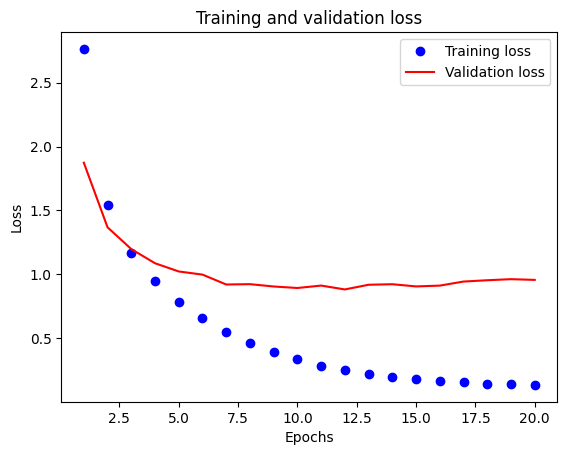

In [12]:
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

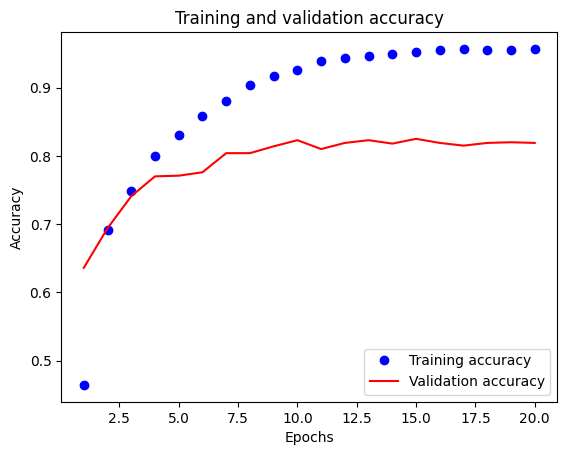

In [14]:
#정확도 위주 함수

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [15]:
#검증된 결과로 다시 학습(신경망 재구성)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,  #위의 결과에서 찾은 최적횟수 입력
                    batch_size=512,
                    validation_data=(x_val, y_val))

eval_result = model.evaluate(x_test, one_hot_test_labels)
print(eval_result)

Epoch 1/10
16/16 [==============================] - 2s 80ms/step - loss: 2.6645 - accuracy: 0.5028 - val_loss: 1.8235 - val_accuracy: 0.5980
Epoch 2/10
16/16 [==============================] - 1s 82ms/step - loss: 1.5584 - accuracy: 0.6570 - val_loss: 1.3929 - val_accuracy: 0.6740
Epoch 3/10
16/16 [==============================] - 1s 73ms/step - loss: 1.1889 - accuracy: 0.7412 - val_loss: 1.1865 - val_accuracy: 0.7340
Epoch 4/10
16/16 [==============================] - 1s 49ms/step - loss: 0.9663 - accuracy: 0.7910 - val_loss: 1.1130 - val_accuracy: 0.7370
Epoch 5/10
16/16 [==============================] - 1s 49ms/step - loss: 0.8016 - accuracy: 0.8296 - val_loss: 1.0072 - val_accuracy: 0.7830
Epoch 6/10
16/16 [==============================] - 1s 47ms/step - loss: 0.6710 - accuracy: 0.8555 - val_loss: 0.9559 - val_accuracy: 0.7930
Epoch 7/10
16/16 [==============================] - 1s 50ms/step - loss: 0.5619 - accuracy: 0.8819 - val_loss: 0.9159 - val_accuracy: 0.8040
Epoch 8/10
16